#### architecture

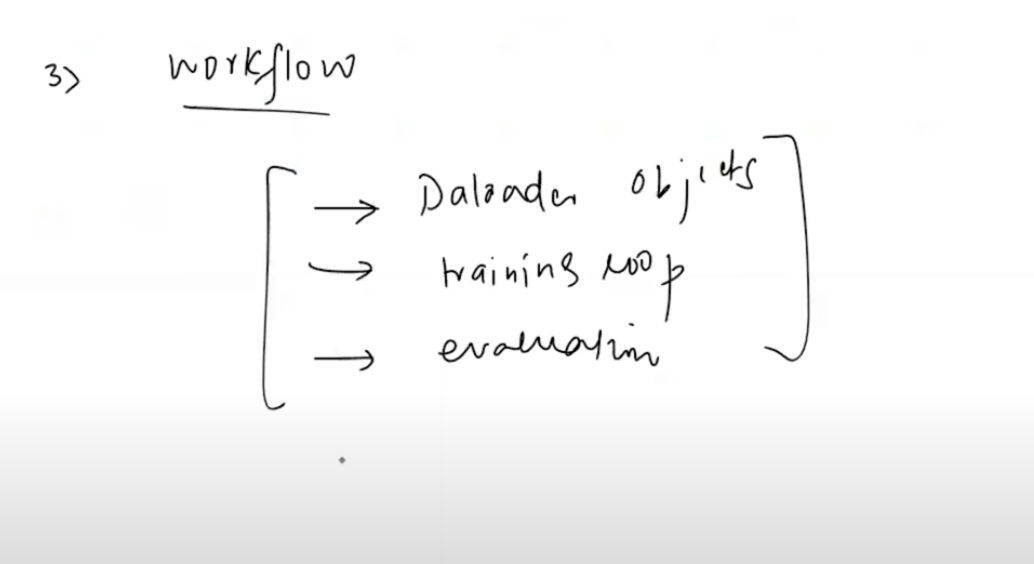

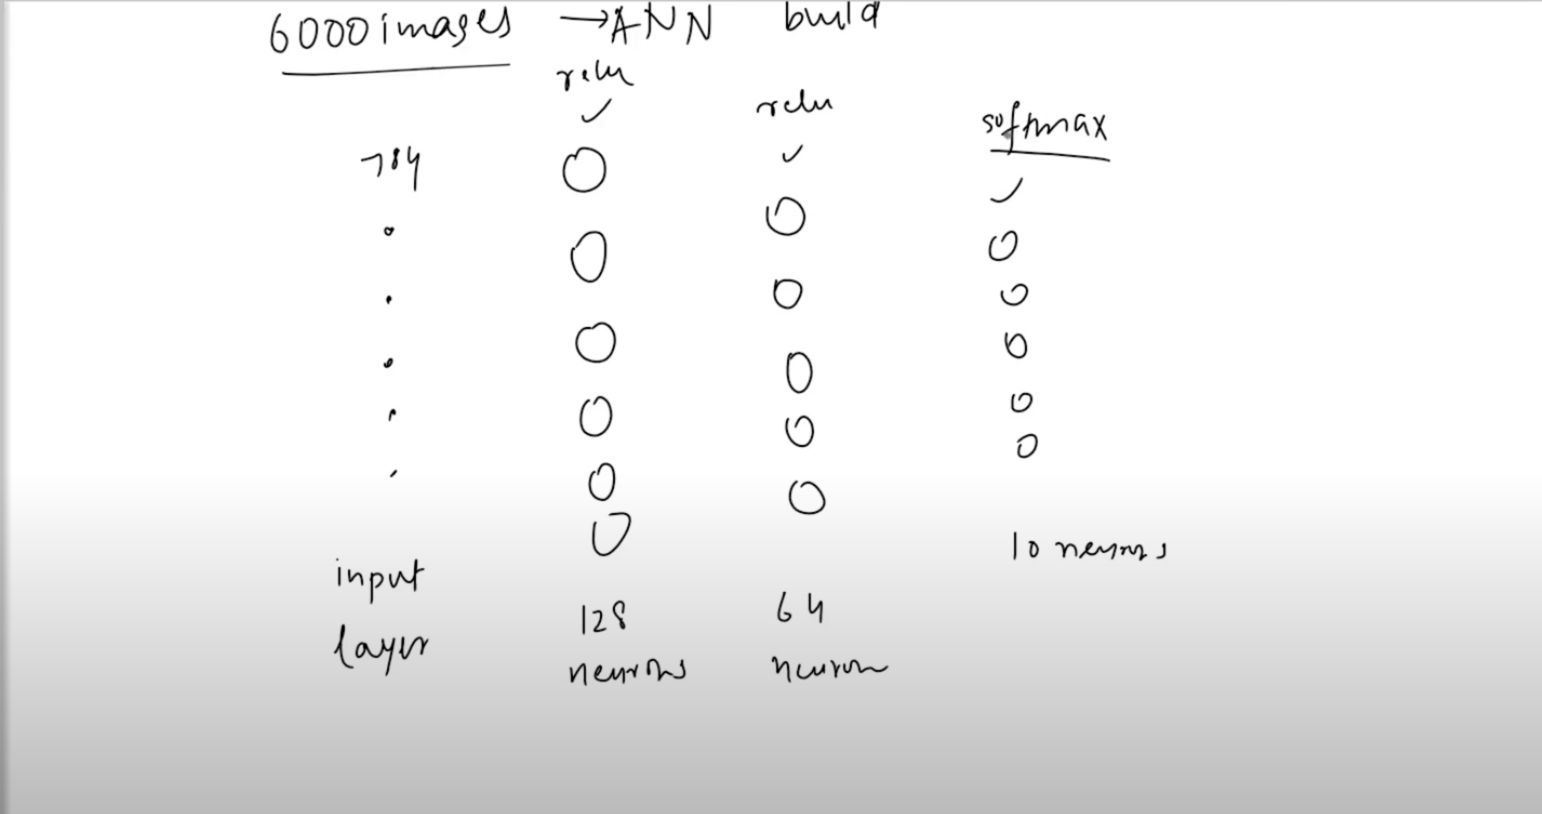

#### Data loading

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [3]:
df = pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


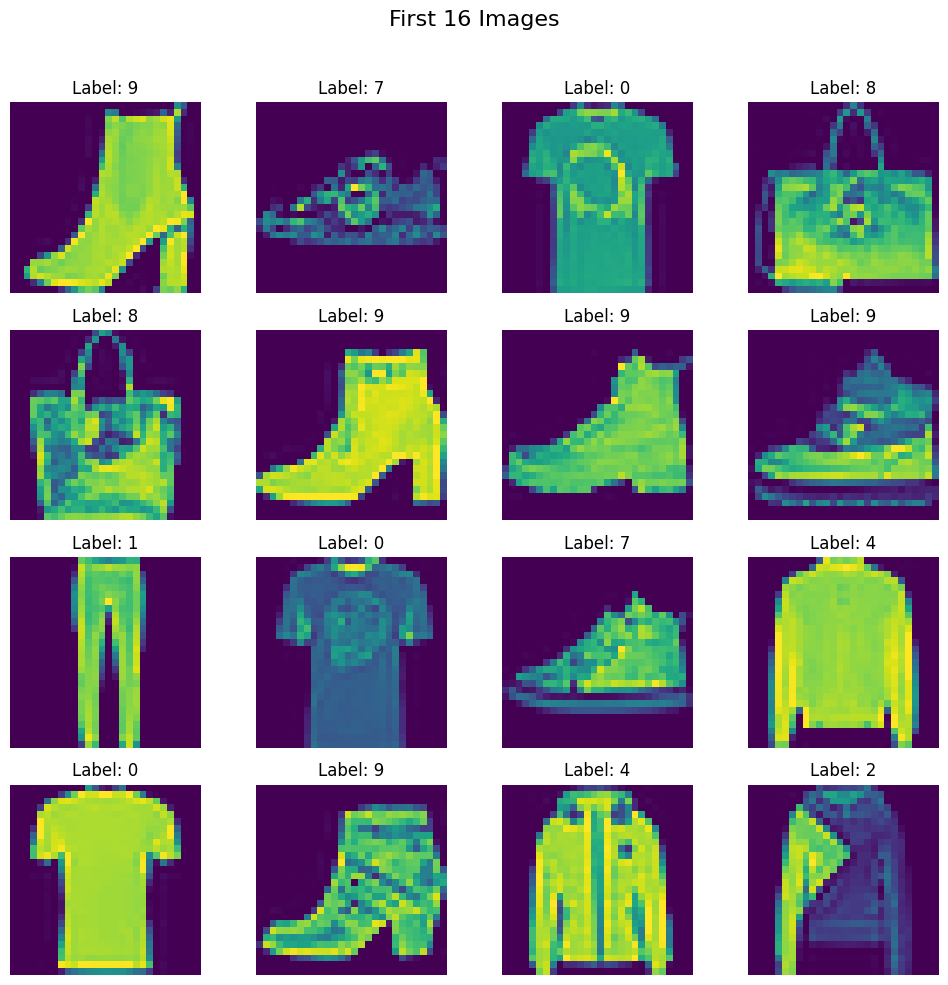

In [4]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [5]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# scaling the feautures
# most of the pixel value is 0 and some are random between 0 to 255
# so for better nn training we divide all the pixel value by the maxm pixel value
# so that every pixel value will be in the range [0 , 1]
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [9]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.2       , 0.        ,
        0.        ]])

In [10]:
# create the coustomDataset class
from torch.utils.data import Dataset, DataLoader
import torch
class CoustomDataset(Dataset):

  def __init__ (self, features, labels):
    self.features = torch.tensor(features, dtype = torch.float32)
    self.labels = torch.tensor(labels , dtype = torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]


In [11]:
# create train dataset object
train_dataset = CoustomDataset(X_train, y_train)

In [12]:
len(train_dataset)

4800

In [13]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [14]:
# create the test dataset object
test_dataset = CoustomDataset(X_test, y_test)

In [15]:
len(test_dataset)

1200

In [16]:
test_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [17]:
# create a train loader and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#### Training part

In [20]:
# creating NN class
from torch import nn

class MyNN(nn.Module) :

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128 , 64),
        nn.ReLU(),
        nn.Linear(64, 10)
        # no need to explicitly add softmax cause pytorch implements it during cross entrophy loss
    )


  def forward(self , features):
    return self.model(features)




In [22]:
# set learning rate and epochs

learning_rate = 0.1
epochs = 100

In [23]:
# intanstiate the model

model = MyNN(X_train.shape[1])

# loss function

lossFun = nn.CrossEntropyLoss()

# optimizer

optimizer = optim.SGD(model.parameters(), lr=learning_rate)


In [24]:
len(train_loader)

150

In [25]:
#  training loop

for epoch in range(epochs):
  total_epoch_loss = 0;
  for batch_features, batch_labels in train_loader:

    # forward pass
    y_pred = model(batch_features)

    # calculate loss
    loss = lossFun(y_pred, batch_labels)
    total_epoch_loss += loss.item()

    # zero the gradients
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # parameters update
    optimizer.step()

  avg_loss_in_each_epoch = total_epoch_loss/len(train_loader)
  print(f"epoch : {epoch} , loss : {avg_loss_in_each_epoch}")

epoch : 0 , loss : 1.3513192053635914
epoch : 1 , loss : 0.801848247051239
epoch : 2 , loss : 0.6689845639467239
epoch : 3 , loss : 0.5903442245721817
epoch : 4 , loss : 0.5410629061857859
epoch : 5 , loss : 0.5036374641458193
epoch : 6 , loss : 0.47584273387988407
epoch : 7 , loss : 0.4656693124771118
epoch : 8 , loss : 0.4376130170623461
epoch : 9 , loss : 0.4110328116019567
epoch : 10 , loss : 0.394530141154925
epoch : 11 , loss : 0.3721788317958514
epoch : 12 , loss : 0.36026493738094967
epoch : 13 , loss : 0.34342914854486783
epoch : 14 , loss : 0.3372481831908226
epoch : 15 , loss : 0.3081942108273506
epoch : 16 , loss : 0.30489986705283323
epoch : 17 , loss : 0.2964658277233442
epoch : 18 , loss : 0.2825211075445016
epoch : 19 , loss : 0.27528222257892293
epoch : 20 , loss : 0.2673994553089142
epoch : 21 , loss : 0.2614405415703853
epoch : 22 , loss : 0.24750155967970688
epoch : 23 , loss : 0.24814570896327495
epoch : 24 , loss : 0.23560028369228045
epoch : 25 , loss : 0.2213239

In [26]:
# set model to eval model
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [28]:
# evaluation code

total = 0
correct = 0;

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features) # forward pass :- this will give a probability matrix with 10 column
                  # and the column having the maximum probability will be it's label

    _ , predicted_label = torch.max(outputs , 1)

    total += batch_labels.shape[0]


    correct += (predicted_label == batch_labels).sum().item()


print(f"Accuracy = {correct / total}")


Accuracy = 0.8383333333333334
